Run a quick simulation to view the A matrix

System size: (400, 400)
Grid: 20 x 10 = 200 nodes
State vector size: 400
Source at grid point: (10, 1)


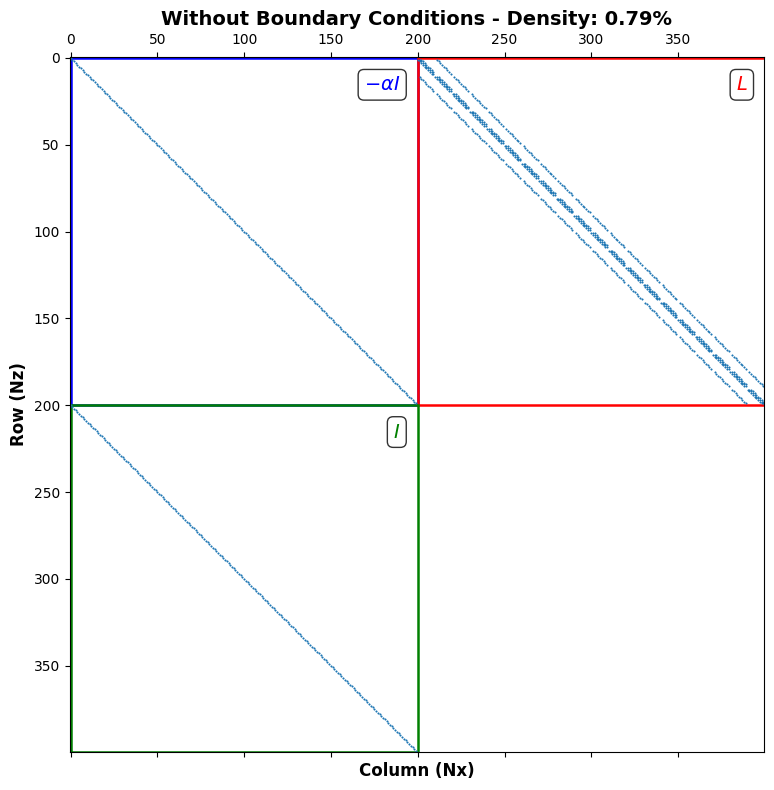

Without BC: 0.79% (1,262 non-zero entries)


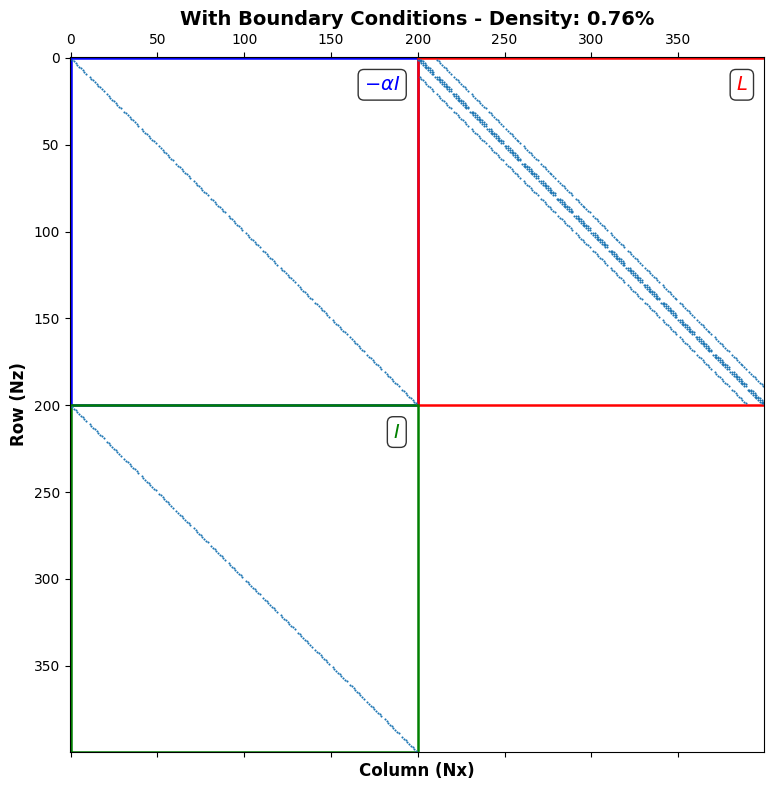

With BC:    0.76% (1,222 non-zero entries)
cond₂(A) = inf
A dtype: float64
Max decimal digits for float64: 15 so can work with at most ~-inf digits of precision


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from getParam_Sonar import getParam_Sonar
from matplotlib.patches import Rectangle

Nx, Nz = 20, 10 
Lx, Lz = 200, 100 

# Get parameters WITHOUT boundary conditions
p_noBC, x_start_noBC, t_start, t_stop, max_dt_FE_noBC = getParam_Sonar(Nx, Nz, Lx, Lz, UseSparseMatrices=False, BC=False)
A_noBC = p_noBC['A']
N = Nx * Nz

# Get parameters WITH boundary conditions
p, x_start, t_start, t_stop, max_dt_FE = getParam_Sonar(Nx, Nz, Lx, Lz, UseSparseMatrices=False, BC=True)
A = p['A']
B = p['B']

print(f"System size: {A.shape}")
print(f"Grid: {Nx} x {Nz} = {N} nodes")
print(f"State vector size: {2*N}")
print(f"Source at grid point: ({p['sonar_ix']}, {p['sonar_iz']})")

# Visualize sparsity patterns in separate plots
fig1, ax1 = plt.subplots(figsize=(8, 8))

# WITHOUT boundary conditions
density_noBC = np.count_nonzero(A_noBC) / A_noBC.size
ax1.spy(A_noBC, markersize=0.5)
ax1.set_title(f'Without Boundary Conditions - Density: {density_noBC:.2%}', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Column (Nx)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Row (Nz)', fontsize=12, fontweight='bold')

# Outline the -αI block (top-left N x N)
ax1.add_patch(Rectangle((0, 0), N, N, fill=False, edgecolor='blue', linewidth=1.8))
ax1.text(N*0.95, N*0.05, r'$-\alpha I$', color='blue', ha='right', va='top', 
         fontsize=14, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Outline the L block (top-right N x N)
ax1.add_patch(Rectangle((N, 0), N, N, fill=False, edgecolor='red', linewidth=1.8))
ax1.text(N*1.95, N*0.05, r'$L$', color='red', ha='right', va='top', 
         fontsize=14, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Outline the I block (bottom-left N x N)
ax1.add_patch(Rectangle((0, N), N, N, fill=False, edgecolor='green', linewidth=1.8))
ax1.text(N*0.95, N*1.05, r'$I$', color='green', ha='right', va='top', 
         fontsize=14, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Without BC: {density_noBC:.2%} ({np.count_nonzero(A_noBC):,} non-zero entries)")

# Second plot - WITH boundary conditions
fig2, ax2 = plt.subplots(figsize=(8, 8))

density_BC = np.count_nonzero(A) / A.size
ax2.spy(A, markersize=0.5)
ax2.set_title(f'With Boundary Conditions - Density: {density_BC:.2%}', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Column (Nx)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Row (Nz)', fontsize=12, fontweight='bold')

# Outline the -αI block (top-left N x N)
ax2.add_patch(Rectangle((0, 0), N, N, fill=False, edgecolor='blue', linewidth=1.8))
ax2.text(N*0.95, N*0.05, r'$-\alpha I$', color='blue', ha='right', va='top', 
         fontsize=14, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Outline the L block (top-right N x N)
ax2.add_patch(Rectangle((N, 0), N, N, fill=False, edgecolor='red', linewidth=1.8))
ax2.text(N*1.95, N*0.05, r'$L$', color='red', ha='right', va='top', 
         fontsize=14, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Outline the I block (bottom-left N x N)
ax2.add_patch(Rectangle((0, N), N, N, fill=False, edgecolor='green', linewidth=1.8))
ax2.text(N*0.95, N*1.05, r'$I$', color='green', ha='right', va='top', 
         fontsize=14, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"With BC:    {density_BC:.2%} ({np.count_nonzero(A):,} non-zero entries)")

# 2-norm condition number: κ₂(A) = σ_max / σ_min
kappa2_A = np.linalg.cond(A)             
print(f"cond₂(A) = {kappa2_A:.3e}")
print(f"A dtype: {A.dtype}")
print(f"Max decimal digits for {A.dtype}: {np.finfo(A.dtype).precision} so can work with at most ~{np.finfo(A.dtype).precision - np.log10(kappa2_A):.0f} digits of precision")


# What you see:
#   d[w]/dt = [L  -αI][w] + [b]u
#    [p]      [I   0 ][p]   [0]

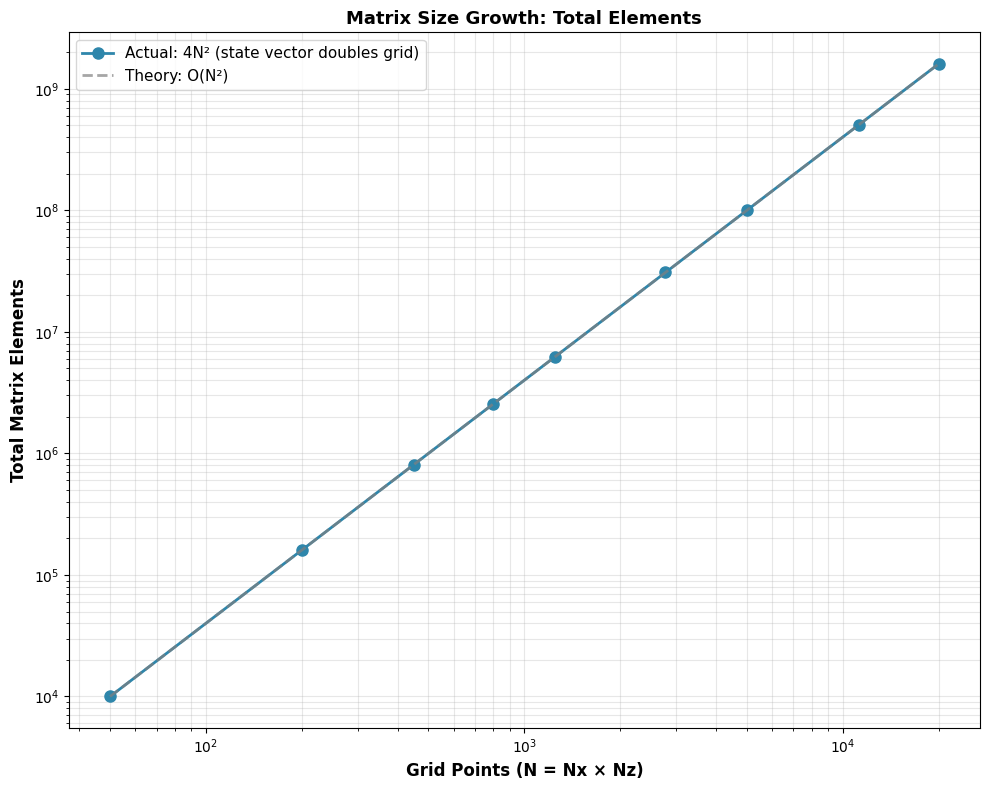

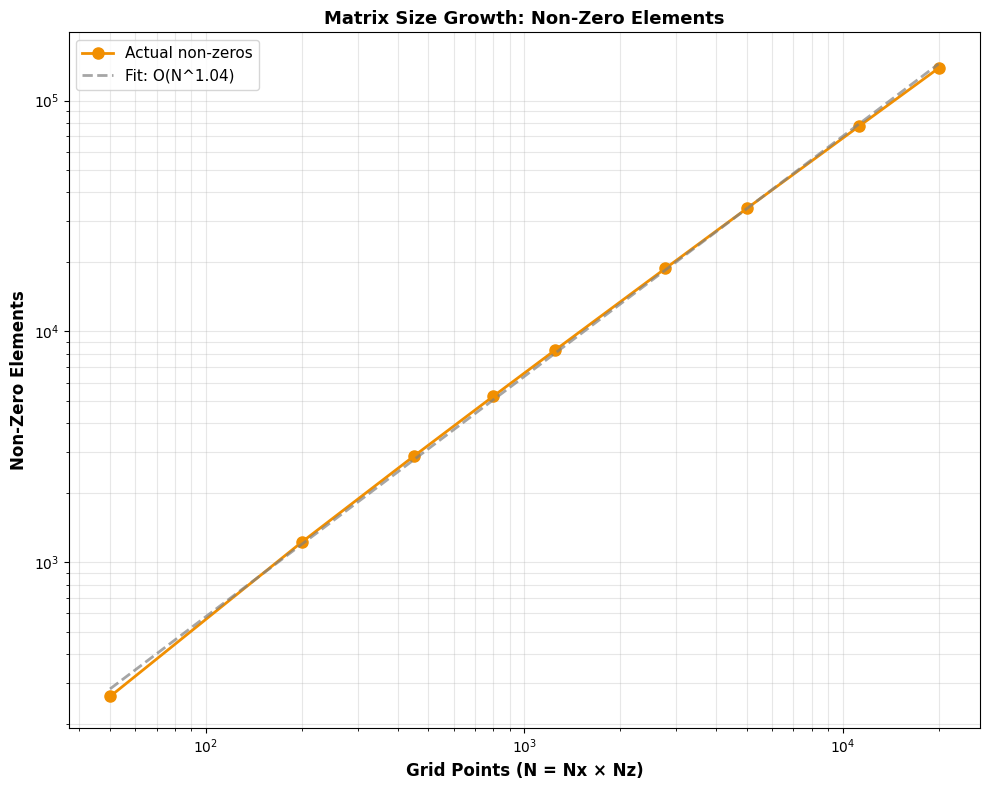

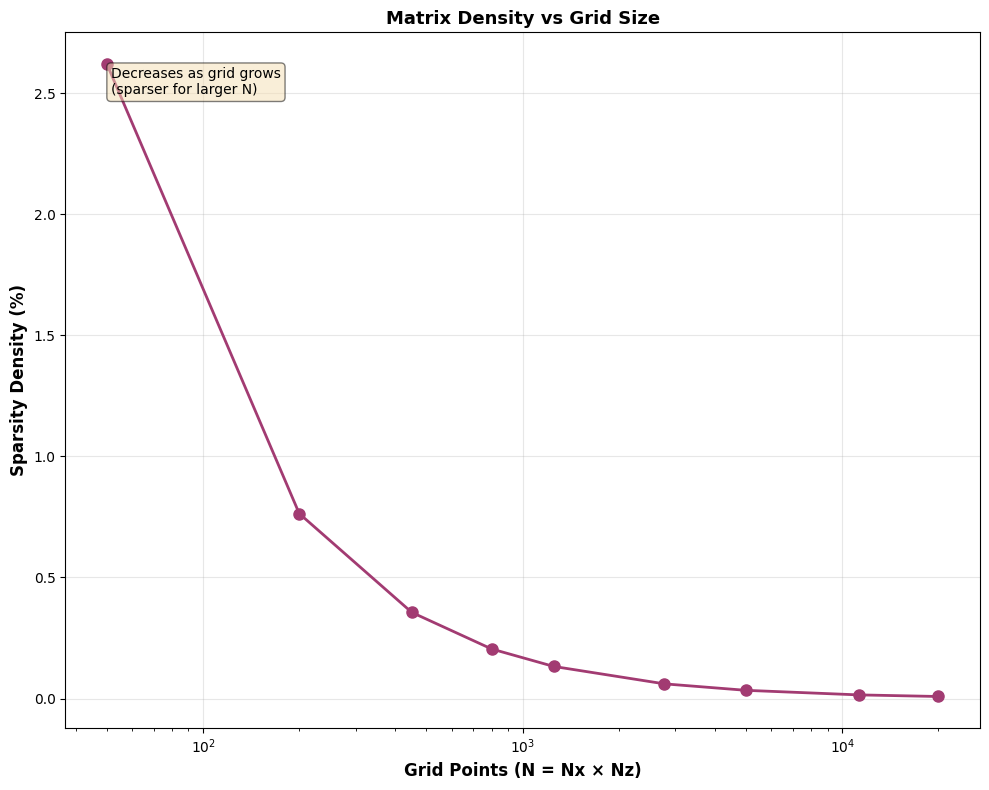

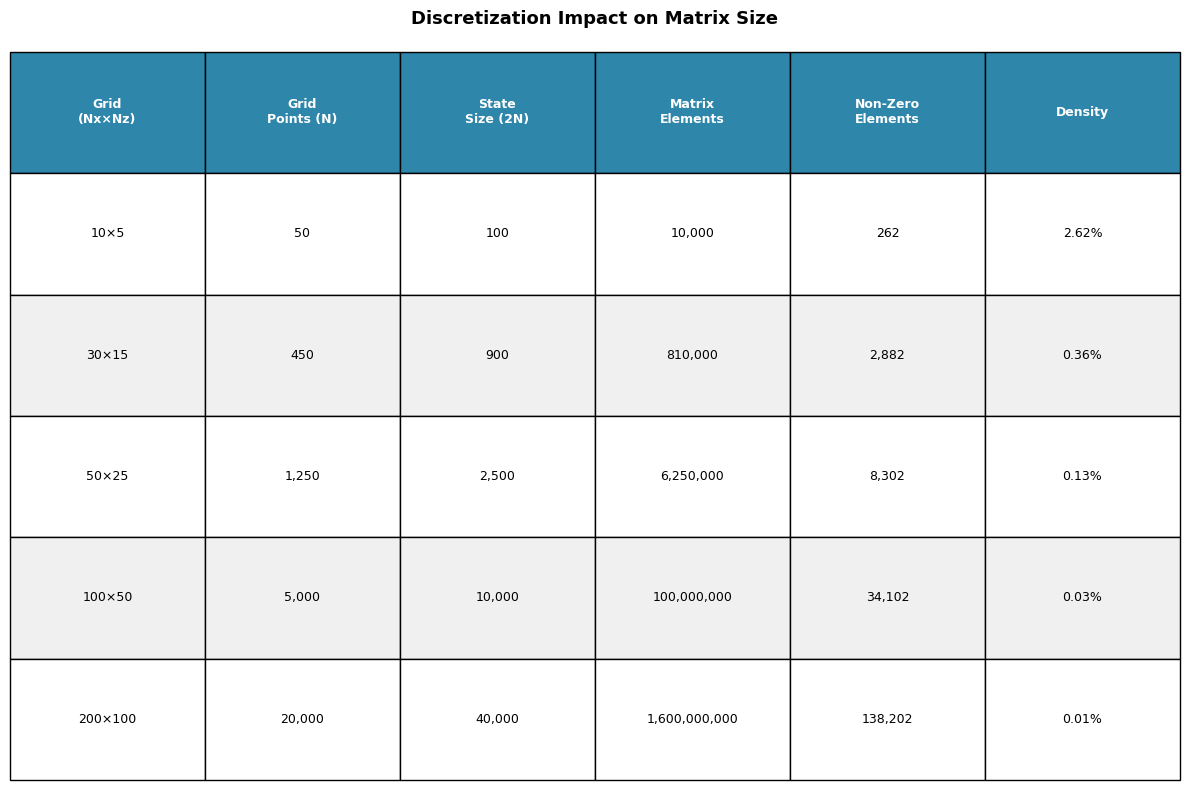

MATRIX SCALING ANALYSIS

Scaling exponent for non-zero elements: 1.041
Expected: ~1.0 for sparse banded matrices (Laplacian has O(N) non-zeros)
         ~2.0 for dense matrices

Actual behavior: Matrix is SPARSE

Smallest grid (10×5):
  State size: 100
  Matrix elements: 10,000
  Non-zeros: 262 (2.62%)

Largest grid (200×100):
  State size: 40,000
  Matrix elements: 1,600,000,000
  Non-zeros: 138,202 (0.01%)

Size increase factor: 400.0×
Matrix elements increase: 160000.0×
Non-zeros increase: 527.5×


In [10]:
# Analyze how matrix size grows with discretization
# Test various grid sizes to show O(N²) scaling

# Define range of grid sizes to test
grid_sizes = [10, 20, 30, 40, 50, 75, 100, 150, 200]
Lx, Lz = 3000, 1500  # Fixed domain size

results = []
for grid_N in grid_sizes:
    # Keep aspect ratio constant (2:1)
    Nx = grid_N
    Nz = grid_N // 2
    
    p_temp, _, _, _, _ = getParam_Sonar(Nx, Nz, Lx, Lz, UseSparseMatrices=False, BC=True)
    A_temp = p_temp['A']
    
    N_grid = Nx * Nz  # Number of spatial grid points
    N_state = 2 * N_grid  # State vector size [w, p]
    matrix_elements = N_state * N_state  # Total matrix elements
    nnz = np.count_nonzero(A_temp)  # Non-zero elements
    
    results.append({
        'Nx': Nx,
        'Nz': Nz,
        'N_grid': N_grid,
        'N_state': N_state,
        'matrix_elements': matrix_elements,
        'nnz': nnz,
        'density': nnz / matrix_elements
    })
    
    del A_temp, p_temp  # Clean up memory

# Convert to arrays for plotting
N_grid_vals = np.array([r['N_grid'] for r in results])
N_state_vals = np.array([r['N_state'] for r in results])
matrix_elements_vals = np.array([r['matrix_elements'] for r in results])
nnz_vals = np.array([r['nnz'] for r in results])

# Plot 1: Matrix elements vs grid points (log-log to show O(N²))
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.loglog(N_grid_vals, matrix_elements_vals, 'o-', linewidth=2, markersize=8, 
           label='Actual: 4N² (state vector doubles grid)', color='#2E86AB')
# Reference line: O(N²)
N_ref = np.array([N_grid_vals[0], N_grid_vals[-1]])
O_N2 = 4 * N_ref**2  # Factor of 4 because state is 2N and matrix is (2N)²
ax1.loglog(N_ref, O_N2, '--', linewidth=2, label='Theory: O(N²)', 
           color='gray', alpha=0.7)
ax1.set_xlabel('Grid Points (N = Nx × Nz)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Matrix Elements', fontsize=12, fontweight='bold')
ax1.set_title('Matrix Size Growth: Total Elements', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('matrix_scaling_total_elements.png', dpi=150, bbox_inches='tight')
plt.show()

# Plot 2: Non-zero elements vs grid points
fig2, ax2 = plt.subplots(figsize=(10, 8))
ax2.loglog(N_grid_vals, nnz_vals, 'o-', linewidth=2, markersize=8, 
           label='Actual non-zeros', color='#F18F01')
# Fit to determine actual scaling
coeffs = np.polyfit(np.log(N_grid_vals), np.log(nnz_vals), 1)
scaling_exponent = coeffs[0]
fit_line = np.exp(coeffs[1]) * N_grid_vals**scaling_exponent
ax2.loglog(N_grid_vals, fit_line, '--', linewidth=2, 
           label=f'Fit: O(N^{scaling_exponent:.2f})', color='gray', alpha=0.7)
ax2.set_xlabel('Grid Points (N = Nx × Nz)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Non-Zero Elements', fontsize=12, fontweight='bold')
ax2.set_title('Matrix Size Growth: Non-Zero Elements', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.savefig('matrix_scaling_nonzero_elements.png', dpi=150, bbox_inches='tight')
plt.show()

# Plot 3: Sparsity density vs grid size
fig3, ax3 = plt.subplots(figsize=(10, 8))
density_vals = np.array([r['density'] for r in results])
ax3.semilogx(N_grid_vals, density_vals * 100, 'o-', linewidth=2, markersize=8, 
             color='#A23B72')
ax3.set_xlabel('Grid Points (N = Nx × Nz)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Sparsity Density (%)', fontsize=12, fontweight='bold')
ax3.set_title('Matrix Density vs Grid Size', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.text(0.05, 0.95, f'Decreases as grid grows\n(sparser for larger N)', 
         transform=ax3.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
plt.savefig('matrix_scaling_density.png', dpi=150, bbox_inches='tight')
plt.show()

# Plot 4: Summary table of key sizes
fig4, ax4 = plt.subplots(figsize=(12, 8))
ax4.axis('off')
table_data = []
for i, r in enumerate(results[::2]):  # Show every other result to fit
    table_data.append([
        f"{r['Nx']}×{r['Nz']}",
        f"{r['N_grid']:,}",
        f"{r['N_state']:,}",
        f"{r['matrix_elements']:,}",
        f"{r['nnz']:,}",
        f"{r['density']*100:.2f}%"
    ])

table = ax4.table(cellText=table_data,
                  colLabels=['Grid\n(Nx×Nz)', 'Grid\nPoints (N)', 'State\nSize (2N)', 
                            'Matrix\nElements', 'Non-Zero\nElements', 'Density'],
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style header row
for i in range(6):
    table[(0, i)].set_facecolor('#2E86AB')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(table_data) + 1):
    for j in range(6):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax4.set_title('Discretization Impact on Matrix Size', fontsize=13, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('matrix_scaling_table.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary statistics
print("="*80)
print("MATRIX SCALING ANALYSIS")
print("="*80)
print(f"\nScaling exponent for non-zero elements: {scaling_exponent:.3f}")
print(f"Expected: ~1.0 for sparse banded matrices (Laplacian has O(N) non-zeros)")
print(f"         ~2.0 for dense matrices")
print(f"\nActual behavior: Matrix is {'SPARSE' if scaling_exponent < 1.5 else 'DENSE'}")
print(f"\nSmallest grid ({results[0]['Nx']}×{results[0]['Nz']}):")
print(f"  State size: {results[0]['N_state']:,}")
print(f"  Matrix elements: {results[0]['matrix_elements']:,}")
print(f"  Non-zeros: {results[0]['nnz']:,} ({results[0]['density']*100:.2f}%)")
print(f"\nLargest grid ({results[-1]['Nx']}×{results[-1]['Nz']}):")
print(f"  State size: {results[-1]['N_state']:,}")
print(f"  Matrix elements: {results[-1]['matrix_elements']:,}")
print(f"  Non-zeros: {results[-1]['nnz']:,} ({results[-1]['density']*100:.2f}%)")
print(f"\nSize increase factor: {results[-1]['N_grid'] / results[0]['N_grid']:.1f}×")
print(f"Matrix elements increase: {results[-1]['matrix_elements'] / results[0]['matrix_elements']:.1f}×")
print(f"Non-zeros increase: {results[-1]['nnz'] / results[0]['nnz']:.1f}×")
print("="*80)

Next, run provided SimpleSolver. We don't expect stable behavior, since Forward Euler is non-ideal for wave propagation.

In [11]:
from eval_f_Sonar import eval_f_Sonar
from eval_u_Sonar import eval_u_Sonar_20, eval_u_Sonar_20_const
from SimpleSolver import SimpleSolver

Nx, Nz = 100, 50    # Nx, Nz = 20, 20  
Lx, Lz = 10e3, 1e3   # Lx, Lz = 50, 50  

p, x_start, t_start, t_stop, max_dt_FE = getParam_Sonar(Nx, Nz, Lx, Lz, UseSparseMatrices=True)

eval_u = eval_u_Sonar_20 # eval_u_Sonar_20_const
# Scale u(t) by cell area so Bu remains grid-invariant with b=1/(dx*dz)
def eval_u_scaled(t):
    return (p['dx']*p['dz']) * eval_u(t)
eval_f = eval_f_Sonar

visualize = False
w = max_dt_FE * 0.1
num_iter = int(np.ceil((t_stop - t_start) / w)) 

print(f"Number of iterations: {num_iter}")

[X, t] = SimpleSolver(eval_f, x_start, p, eval_u, num_iter, w, visualize, gif_file_name="test_SimpleSolver_Sonar.gif")

Number of iterations: 13860
started running a simple solver, please wait...


(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Sonar Simulation Domain Setup'}, xlabel='X Distance (m)', ylabel='Z Depth (m)'>)

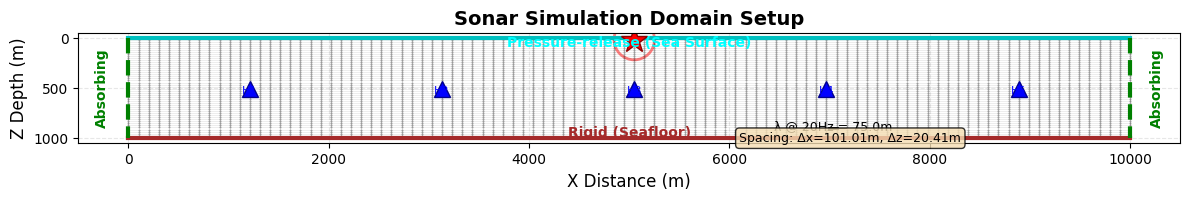

In [12]:
from visualize_sonar import visualize_sonar_setup

visualize_sonar_setup(p, show_grid=True, show_boundary_labels=True)

# hydrophone

Processing hydrophone data...


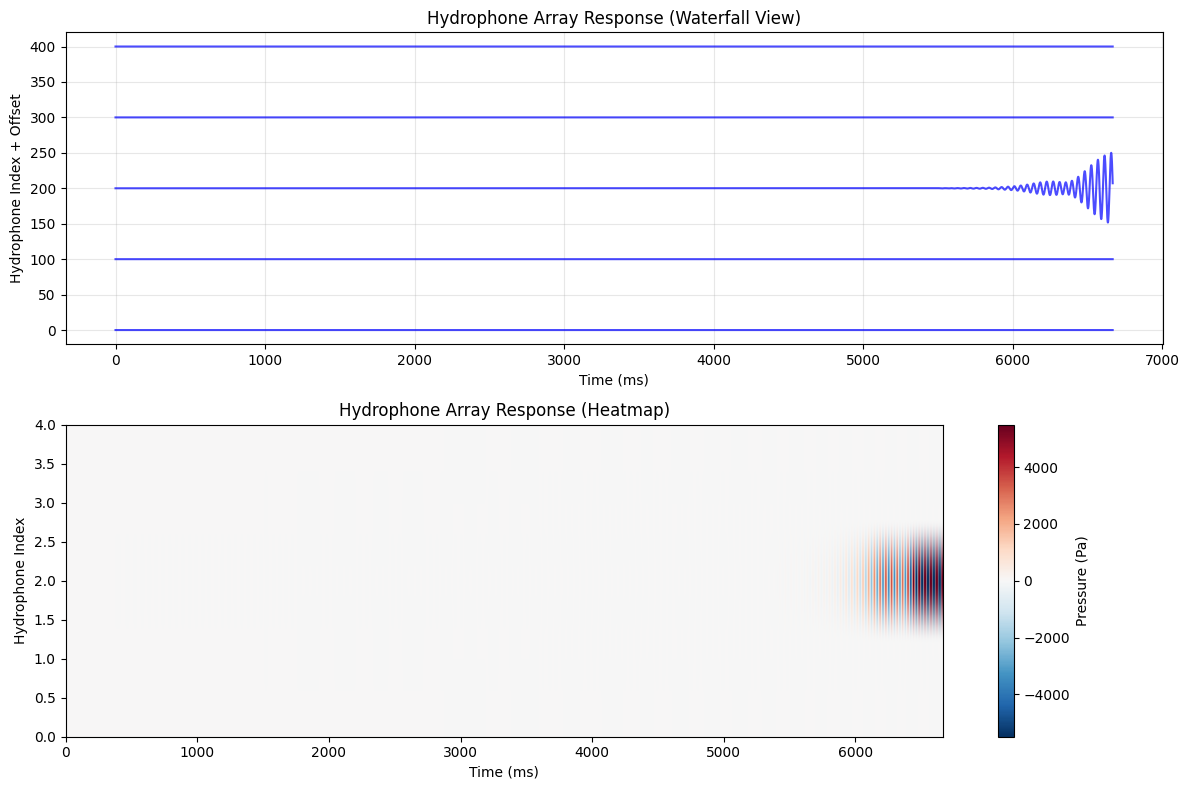

In [13]:
from eval_g_Sonar import eval_g_Sonar

# extract hydrophone outputs over time
print("Processing hydrophone data...")
num_phones = len(p['hydrophones']['x_indices'])
hydrophone_history = np.zeros((num_phones, len(t)))

for i in range(len(t)):
    y = eval_g_Sonar(X[:, i], p)
    hydrophone_history[:, i] = y.flatten()


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

adjust_view = 1e7 #1e9
# Auto-scale waveform display so traces are visible relative to offsets
amp = float(np.nanmax(np.abs(hydrophone_history)) + 1e-12)
adjust_view = 50.0 / amp
# Auto-scale waveform display so traces are visible relative to offsets
amp = float(np.nanmax(np.abs(hydrophone_history)) + 1e-12)
adjust_view = 50.0 / amp

# waterfall plot 
for i in range(num_phones):
    x_pos = p['hydrophones']['x_indices'][i] * p['dx']
    ax1.plot(t*1000, adjust_view*hydrophone_history[i, :] + i*100, 'b-', alpha=0.7)
    
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Hydrophone Index + Offset')
ax1.set_title('Hydrophone Array Response (Waterfall View)')
ax1.grid(True, alpha=0.3)

# heatmap 
vmax = float(np.quantile(np.abs(hydrophone_history), 0.995) + 1e-12)
vmin = -vmax
im = ax2.imshow(hydrophone_history, aspect='auto', origin='lower',
                extent=[t[0]*1000, t[-1]*1000, 0, num_phones-1],
                cmap='RdBu_r')
im.set_clim(vmin=vmin, vmax=vmax)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Hydrophone Index')
ax2.set_title('Hydrophone Array Response (Heatmap)')
plt.colorbar(im, ax=ax2, label='Pressure (Pa)')

plt.tight_layout()
plt.show()

In [14]:
from simpleLeapFrog import *

X, t = LeapfrogSolver(eval_f, x_start, p, eval_u_scaled, num_iter, dt=w, visualize=False)

Running Leapfrog solver (stable for wave equations)...
Bootstrapping with RK4 for first step...
Running 13859 leapfrog steps...
  Progress: 10.0%
  Progress: 10.0%
  Progress: 20.0%
  Progress: 20.0%
  Progress: 30.0%
  Progress: 30.0%
  Progress: 40.0%
  Progress: 40.0%
  Progress: 50.0%
  Progress: 50.0%
  Progress: 60.0%
  Progress: 60.0%
  Progress: 70.0%
  Progress: 70.0%
  Progress: 80.0%
  Progress: 80.0%
  Progress: 90.0%
  Progress: 90.0%
Leapfrog integration complete!
Leapfrog integration complete!


Processing hydrophone data...


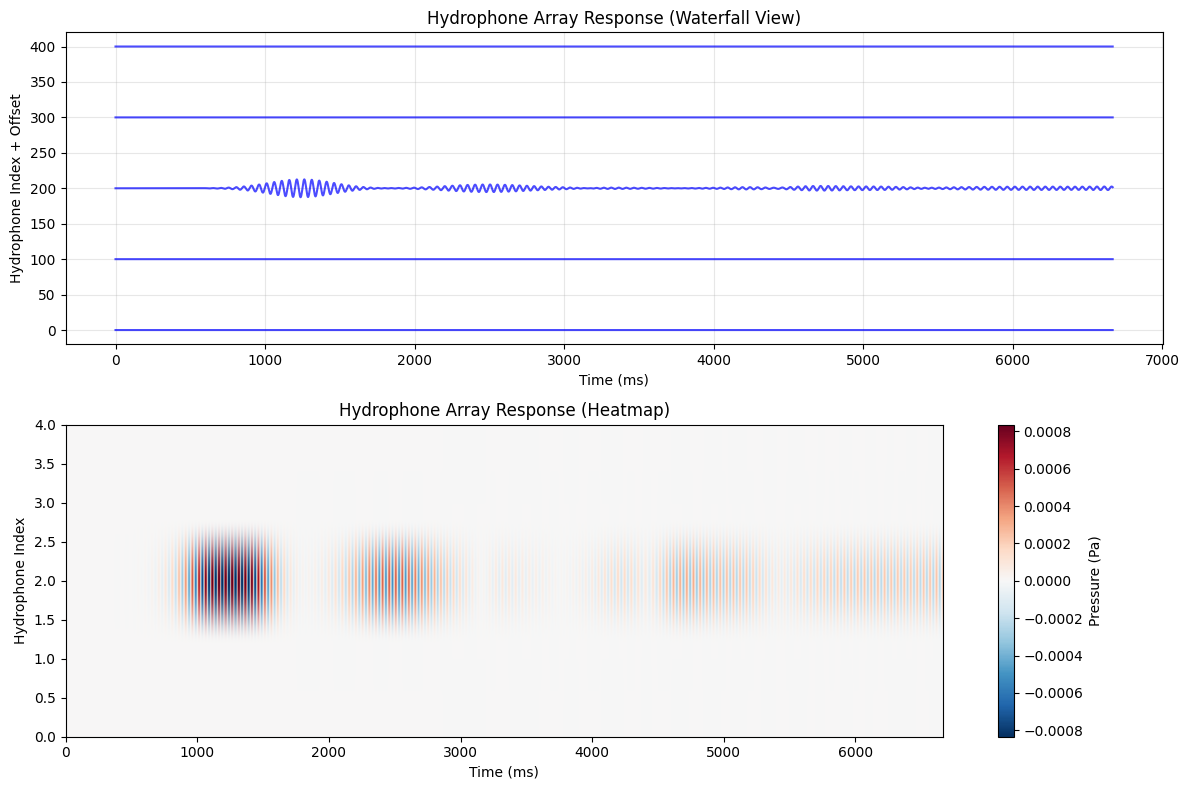

In [17]:
from eval_g_Sonar import eval_g_Sonar

# extract hydrophone outputs over time
print("Processing hydrophone data...")
num_phones = len(p['hydrophones']['x_indices'])
hydrophone_history = np.zeros((num_phones, len(t)))

for i in range(len(t)):
    y = eval_g_Sonar(X[:, i], p)
    hydrophone_history[:, i] = y.flatten()


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

adjust_view = 1e4 #1e9

# waterfall plot 
for i in range(num_phones):
    x_pos = p['hydrophones']['x_indices'][i] * p['dx']
    ax1.plot(t*1000, adjust_view*hydrophone_history[i, :] + i*100, 'b-', alpha=0.7)
    
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Hydrophone Index + Offset')
ax1.set_title('Hydrophone Array Response (Waterfall View)')
ax1.grid(True, alpha=0.3)

# heatmap 
vmax = float(np.quantile(np.abs(hydrophone_history), 0.995) + 1e-12)
vmin = -vmax
im = ax2.imshow(hydrophone_history, aspect='auto', origin='lower',
                extent=[t[0]*1000, t[-1]*1000, 0, num_phones-1],
                cmap='RdBu_r')
im.set_clim(vmin=vmin, vmax=vmax)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Hydrophone Index')
ax2.set_title('Hydrophone Array Response (Heatmap)')
plt.colorbar(im, ax=ax2, label='Pressure (Pa)')

plt.tight_layout()
plt.show()


SOLVER STABILITY COMPARISON

1. Testing SimpleSolver (Forward Euler)...
started running a simple solver, please wait...

2. Testing LeapfrogSolver...
Running Leapfrog solver (stable for wave equations)...
Bootstrapping with RK4 for first step...
Running 20787 leapfrog steps...

2. Testing LeapfrogSolver...
Running Leapfrog solver (stable for wave equations)...
Bootstrapping with RK4 for first step...
Running 20787 leapfrog steps...
  Progress: 10.0%
  Progress: 10.0%
  Progress: 20.0%
  Progress: 20.0%
  Progress: 30.0%
  Progress: 30.0%
  Progress: 40.0%
  Progress: 40.0%
  Progress: 50.0%
  Progress: 50.0%
  Progress: 60.0%
  Progress: 60.0%
  Progress: 70.0%
  Progress: 70.0%
  Progress: 80.0%
  Progress: 80.0%
  Progress: 90.0%
  Progress: 90.0%
  Progress: 100.0%
Leapfrog integration complete!
  Progress: 100.0%
Leapfrog integration complete!

RESULTS:
Forward Euler - Final energy ratio: 1.24e+37
Leapfrog      - Final energy ratio: 5.74e-02
⚠️  Forward Euler is UNSTABLE (growing 

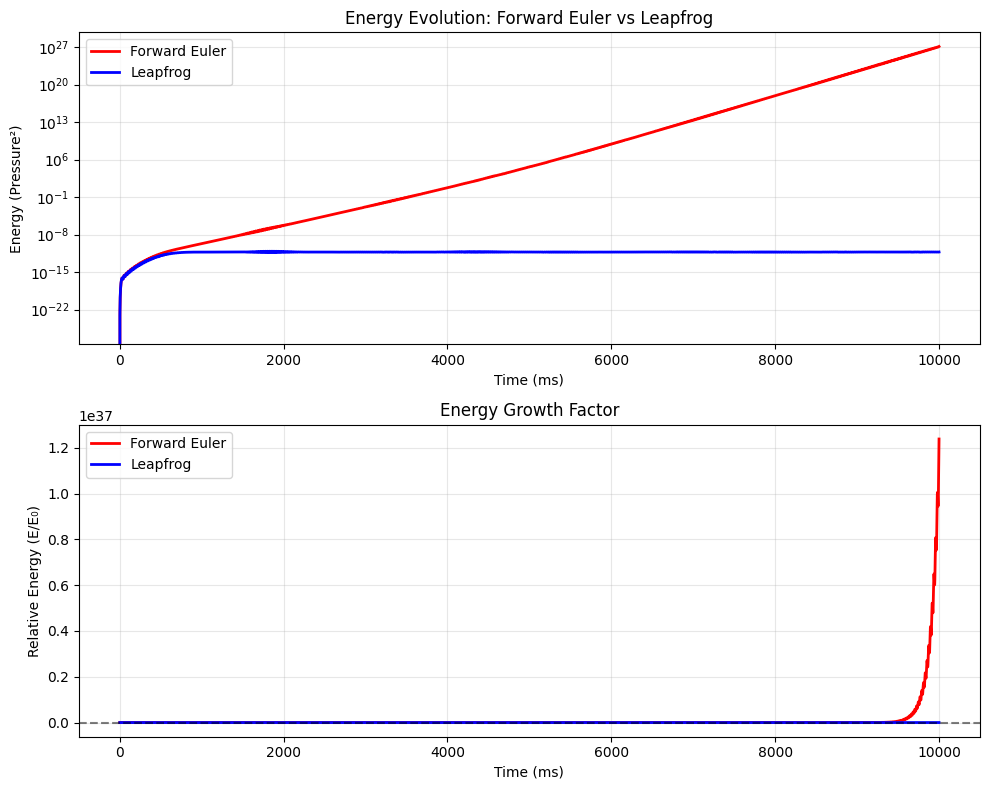

In [16]:
# Compare solvers
fig = test_solver_stability(p, eval_f, eval_u, x_start, max_dt_FE)
plt.show()

Implement our own suite of tests

COMPLETE SONAR MODEL TEST SUITE

PART A: MODEL FUNCTIONALITY TESTS

TEST 1: Matrix Dimensions
----------------------------------------
✓ PASSED: Matrix dimensions correct

TEST 2: Zero Input Response
----------------------------------------
✓ PASSED: Zero state remains stable

TEST 3: Source Excitation
----------------------------------------
✓ PASSED: Source generates signal: -2.15e-16 Pa

TEST 4: CFL Condition
----------------------------------------
✓ PASSED: Timestep 0.001241 respects CFL

TEST 5: Hydrophone Configuration
----------------------------------------
✓ PASSED: 5 hydrophones configured

TEST 6: Short-term Stability
----------------------------------------
started running a simple solver, please wait...
✓ PASSED: No immediate divergence

PART B: JACOBIAN TEST BENCH

TEST 7: Linear System Check
----------------------------------------
✓ PASSED: Jacobian equals A matrix (linear system)

TEST 8: Finite Difference Verification
----------------------------------------
  dx = 1

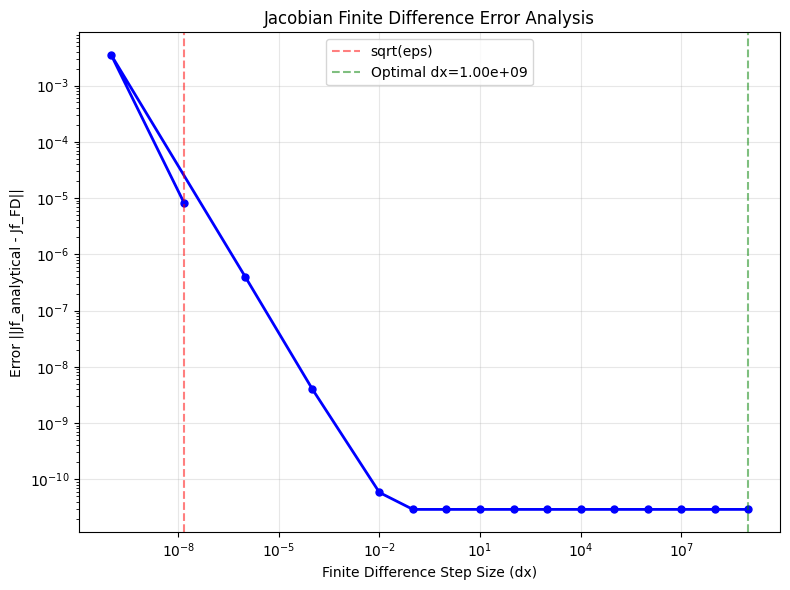


COMPLETE TEST SUMMARY
Total Tests Passed: 10
Total Tests Failed: 0
Overall Success Rate: 100.0%

✓ ALL TESTS PASSED!


(10, 0)

In [18]:
from test_Sonar import test_sonar_complete

test_sonar_complete(eval_u)

# finite differences Jacobian is sitting right around machine precision
# our system is indeed linear! no truncation error

In [19]:
# Test dt sweep for leapfrog
fig = test_dt_sweep_leapfrog(eval_f_Sonar, x_start, p, eval_u,
                             exponents=range(-9, -13, -1),
                             max_steps=100,
                             use_outputs=True,
                             quiet=False)
plt.show()

[sweep] Coarsest Δt=1.0e-09 -> T=1.000e-07 with max_steps=100
[run] Δt_target=1.0e-09 → cold-restart chunks up to max_steps=100
Running Leapfrog solver (stable for wave equations)...
   [Δt=1.0e-09] chunk 1 done (steps=100, t=1.000e-07/1.000e-07)
[run] Δt_target=1.0e-10 → cold-restart chunks up to max_steps=100
Running Leapfrog solver (stable for wave equations)...
   [Δt=1.0e-10] chunk 1 done (steps=100, t=1.000e-08/1.000e-07)
Running Leapfrog solver (stable for wave equations)...
   [Δt=1.0e-10] chunk 2 done (steps=100, t=2.000e-08/1.000e-07)
Running Leapfrog solver (stable for wave equations)...
   [Δt=1.0e-10] chunk 3 done (steps=100, t=3.000e-08/1.000e-07)
Running Leapfrog solver (stable for wave equations)...
   [Δt=1.0e-10] chunk 4 done (steps=100, t=4.000e-08/1.000e-07)
Running Leapfrog solver (stable for wave equations)...
   [Δt=1.0e-10] chunk 5 done (steps=100, t=5.000e-08/1.000e-07)
Running Leapfrog solver (stable for wave equations)...
   [Δt=1.0e-10] chunk 6 done (steps=1

KeyboardInterrupt: 

# wave viz

In [20]:
# Visualize pressure over XZ plane at a given time/index
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sonar_viz import plot_pressure_xz_at

# Interactive index slider if ipywidgets is available; fallback to last frame
try:
    import ipywidgets as widgets
    slider = widgets.IntSlider(value=int(len(np.asarray(t).reshape(-1)) - 1), min=0, max=int(X.shape[1] - 1), step=1, description='Index')
    ui = widgets.HBox([slider])
    out = widgets.interactive_output(lambda Index: plot_pressure_xz_at(p, X, t, index=Index), {'Index': slider})
    display(ui, out)
except Exception as e:
    print('Interactive widgets unavailable; plotting last step. Error:', e)
    plot_pressure_xz_at(p, X, t, index=int(X.shape[1] - 1))

Output()

In [ ]:
import create_wave_animation as cwa
cwa.create_wave_animation(X, t, p, save_filename='wave_animation.gif')

Creating animation with 2772 frames (skip=5)...


In [ ]:
import create_3d_wave_animation as cwa3d
cwa3d.create_3d_wave_animation(X, t, p, save_filename='wave_animation_3d.gif')